## D208 Predictive Modeling PA
##### Submitted By Edwin Perry
### Table of Contents
<ol>
    <li><a href="#A">Research Question</a></li>
    <li><a href="#B">Method Justification</a></li>
    <li><a href="#C">Data Preparation</a></li>
    <li><a href="#D">Initial and Reduced Logistic Regression Model</a></li>
    <li><a href="#E">Analyzing Dataset</a></li>
    <li><a href="#F">Summarizing Findings</a></li>
    <li><a href="#G">Panopto Video</a></li>
</ol>

<a id="A"></a>
#### A: Research Question
##### 1. Providing the question
The research question I elected to examine is as follows: "What factors are most closely associated with a customer leaving the business within the most recent month?" This knowledge would be essential for the business, as understanding the customers' reasons for discontinuing the service can help the business take actions in the future to retain customers for longer periods of times. As acquiring customers costs money, retaining customers is essential for the business to maximize profits.


##### 2. Goals of Analysis
The goals for this analysis is to use a multiple regression model to determine which factors in the telecommunications dataset (independent/explanatory variables) correlate to customers leaving the business (the dependent/target variable). If the analysis can identify these factors, customers can be retained over longer periods of time, thus reducing the necessity of acquiring new customers or allowing for a higher number of concurrent customers, resulting in higher profitability for the business.

<a id="B"></a>
#### B: Method Justification:
##### 1: Assumptions of a Multiple Logistic Regression Model
There are multiple assumptions made when one uses a multiple logistic regression model for data analysis. 
<ol>
    <li>The first of these assumptions is that the dependent variable can be classified as binary. If there are more than two possible values for the dependent variable, then logistic regression is not sufficient to answer the research question</li>
    <li>Another assumption to be made would be that the independent variables are independent of each other. If the independent variables interacted with each other, then that obscures the impact on the dependent variable. This is a phenomenon referred to as multicollinearity</li>
    <li>A multiple logistic regression model also assumes that each data point (each row in the csv file) are independent of each other. If they interacted with each other, then the primary cause of the dependent variable is obscured, with some level of correlation being caused instead by the interaction between data points, rather than some observed variable.</li>
    <li>Furthermore, multiple logistic regression models assume that the model has access to a sufficiently large sample size. Otherwise, factors that are not related may show a false relationship, due to mere coincedence.</li>
</ol>

##### 2: Benefits of Python

The programming language I will be using for this analysis will be Python. There are a number of benefits to using Python for this analysis:
<ol>
    <li>Python's simple, easy to understand syntax will make the steps of this analysis easy to develop and understand</li>
    <li>Python has a number of libraries designed specifically for this type of data analysis, such as sklearn, Pandas, NumPy, and SciPy</li>
    <li>Python's Jupyter Notebooks makes displaying the data, separated out into sections with explanations, incredibly easy</li>    
</ol>
For these reasons, I have decided that Python would be an ideal tool for this data analysis

##### 3: Explanation/Justification of Multiple Logistic Regression as a Technique

Multiple logistic regression is a method used in data analysis to analyze the impact of multiple different independent variables on one dependent variable with two possible values. This corresponds well to the research question. The dataset contains many different explanatory variables that can be tested to find their impact on the dependent variable, and the dependent variable contains only two possibilities: either the customer has cancelled service within the past month or they havent. As such, multiple logistic regression is the best method to answer the research question

<a id="C"></a>
#### C: Data Preparation
##### 1: Goals and Steps

There are a number of issues within the existing dataset. One such existing issue is that zip code is stored as a float, rather than a string. This leads to the loss of leading zeroes in the data. Furthermore, many entries are stored as string data types when they have binary values. This leads to a reduction in efficiency and the utilization of more time/resources in analyzing, when they could be stored as booleans. Finally, outliers exist within the dataset, which may mislead when engaging in data analysis. The steps of the data preperation/cleaning will be as follows
<ol>
    <li>Remove columns unnecessary to answering the research question</li>
    <li>Convert columns that can be to booleans</li>
    <li>Remove any duplicated customer ID's in the dataset, to ensure no customer is double counted</li>
    <li>Remove any entries without an entry in a column that is categorical</li>
    <li>For any entry missing values in a quantitative column, replace the missing value with the median value of the column</li>
    <li>Filter out any entries that have a z-score in a quantitative column more than 3 or less than -3</li>
</ol>

The goal of this data cleaning would be to have a dataset with no outliers in any quantitative fields, no null values in any fields, no unnecessary columns, and all data being formatted correctly and in the most efficient manner

##### 2: Dependent and Independent Variables

All of the variables are summarized and explained below:

<b>Children</b>

The number of children the customer has, stored as an integer. This will be useful in determining whether those with larger sized families are likely to remain as long-term customers.


In [5]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotnine as p9
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [6]:
data = pd.read_csv("/home/edwinp/Downloads/d9rkejv84kd9rk30fi2l/churn_clean.csv")
pd.set_option("display.max_columns", None)

In [7]:
data.Children.value_counts().sort_index()

Children
0     2570
1     2472
2     1495
3     1472
4     1006
5      212
6      187
7      185
8      210
9       92
10      99
Name: count, dtype: int64

<b>Income</b>

The annual income of the customer, as reported at sign up. Stored as a float data type. Used as an independent variable

In [8]:
data.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

<b>Area</b>

The residential area type that the customer lives in. Can be classified as rural, urban, or suburban. Stored as a string data type. Used as an independent variable

In [9]:
data.Area.value_counts().sort_index()

Area
Rural       3327
Suburban    3346
Urban       3327
Name: count, dtype: int64

<b>Age</b>

The age of the customer as reported at sign up. Stored as an integer. Used as an independent variable

In [10]:
data.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

<b>Outage</b>

The number of seconds each week a person experiences an outage on average. Stored as a float. This will used as an independent variable

In [11]:
data.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

<b>Contract</b>

The contract term of the customer, with the options being Month-to-month, One year, and Two year. Stored as a string. This will be used as an independent variable

In [12]:
data.Contract.value_counts().sort_index()

Contract
Month-to-month    5456
One year          2102
Two Year          2442
Name: count, dtype: int64

<b>Monthly Charge</b>

The amount, in dollars, that the customer is charged each month. Stored as a float data type. This is an independent variable

In [13]:
data.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

<b>Marital</b>

Marital status of the customer, as reported at sign-up. Stored as a string data type, with 5 possible values: Divorced, Married, Never Married, Separated, and Widowed. Used as an independent variable

In [14]:
data.Marital.value_counts().sort_index()

Marital
Divorced         2092
Married          1911
Never Married    1956
Separated        2014
Widowed          2027
Name: count, dtype: int64

<b>Gender</b>

The gender of the customer, as reported at sign-up. Stored as a string containing 3 possible values: Female, Male, and Nonbinary. Used as an independent variable to determine if gender may influence the churn of the customer.

In [15]:
data.Gender.value_counts().sort_index()

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

<b>Techie</b>

Whether or not the customer describes themselves as technically inclined, reported at sign-up. Can have two possible values: Yes and No. Currently stored as a string, but will be converted to boolean. An independent varibale to determine whether technological inclination is possibly associated with the customer churn

In [16]:
data.Techie.value_counts().sort_index()

Techie
No     8321
Yes    1679
Name: count, dtype: int64

<b>Tenure</b>

The number of months the customer has stayed with the provider. Stored as a float. Used as an independent variable potentially associated with churn

In [17]:
data.Tenure.describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [18]:
data.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [19]:
data.PaymentMethod.value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

In [20]:
data.Churn.value_counts()

Churn
No     7350
Yes    2650
Name: count, dtype: int64

In [21]:
data['Income'].fillna(data['Income'].median(), inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)
data["MonthlyCharge"].fillna(data["MonthlyCharge"].median(), inplace=True)
data["Outage_sec_perweek"].fillna(data["Outage_sec_perweek"].median(), inplace=True)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Children"].fillna(data["Children"].median(), inplace=True)
data.dropna(how='any',inplace=True)
data.drop_duplicates(subset=['Customer_id'])
zscores = stats.zscore(data['Income'])
data['IncomeZScore'] = zscores
zscores = stats.zscore(data['Tenure'])
data['TenureZScore'] = zscores
zscores = stats.zscore(data['MonthlyCharge'])
data['MonthlyChargeZScore'] = zscores
zscores = stats.zscore(data['Outage_sec_perweek'])
data['Outage_sec_perweekZScore'] = zscores
zscores = stats.zscore(data['Age'])
data['AgeZScore'] = zscores
zscores = stats.zscore(data['Children'])
data['ChildrenZScore'] = zscores
data = data.query("(IncomeZScore < 3 & IncomeZScore > -3) & (TenureZScore < 3 & TenureZScore > -3) & (MonthlyChargeZScore < 3 & MonthlyChargeZScore > -3) & (Outage_sec_perweekZScore < 3 & Outage_sec_perweekZScore > -3) & (AgeZScore < 3 & AgeZScore > -3) & (ChildrenZScore < 3 & ChildrenZScore > -3)")

data = data.drop(["IncomeZScore", 'TenureZScore', 'MonthlyChargeZScore', 'Outage_sec_perweekZScore', 'AgeZScore', 'ChildrenZScore', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Email', 'Contacts', 'Yearly_equip_failure', 'Population', 'PaperlessBilling', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7584 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                7584 non-null   object 
 1   Children            7584 non-null   int64  
 2   Age                 7584 non-null   int64  
 3   Income              7584 non-null   float64
 4   Marital             7584 non-null   object 
 5   Gender              7584 non-null   object 
 6   Churn               7584 non-null   object 
 7   Outage_sec_perweek  7584 non-null   float64
 8   Techie              7584 non-null   object 
 9   Contract            7584 non-null   object 
 10  PaymentMethod       7584 non-null   object 
 11  Tenure              7584 non-null   float64
 12  MonthlyCharge       7584 non-null   float64
 13  Bandwidth_GB_Year   7584 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 888.8+ KB


/tmp/ipykernel_1067/2626371424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/tmp/ipykernel_1067/2626371424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df

In [22]:
display(data.head())

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Techie,Contract,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,0,68,28561.99,Widowed,Male,No,7.978323,No,One year,Credit Card (automatic),6.795513,172.455519,904.536110
1,Urban,1,27,21704.77,Married,Female,Yes,11.699080,Yes,Month-to-month,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,Urban,4,50,9609.57,Widowed,Female,No,10.752800,Yes,Two Year,Credit Card (automatic),15.754144,159.947583,2054.706961
3,Suburban,1,48,18925.23,Married,Male,No,14.913540,Yes,Two Year,Mailed Check,17.087227,119.956840,2164.579412
4,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,No,Month-to-month,Mailed Check,1.670972,149.948316,271.493436


##### 3: Univariate and Bivariate Statistics

([<matplotlib.patches.Wedge at 0x7fc03beedaf0>,
 [Text(-0.72150449311249, 0.8303199783327444, 'No'),
  Text(0.7215045708526536, -0.8303199107806148, 'Yes')],
 [Text(-0.3935479053340854, 0.45290180636331506, '72.8%'),
  Text(0.39354794773781104, -0.45290176951669897, '27.2%')])

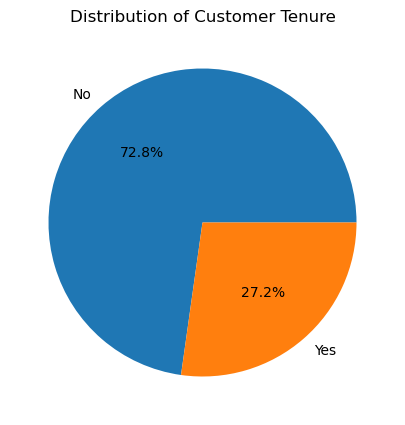

In [23]:
plt.figure(figsize= [15,5])
plt.title("Distribution of Customer Tenure")
churn = data["Churn"].value_counts()
plt.pie(churn, labels=churn.index, autopct='%1.1f%%')

Text(0, 0.5, 'Tenure')

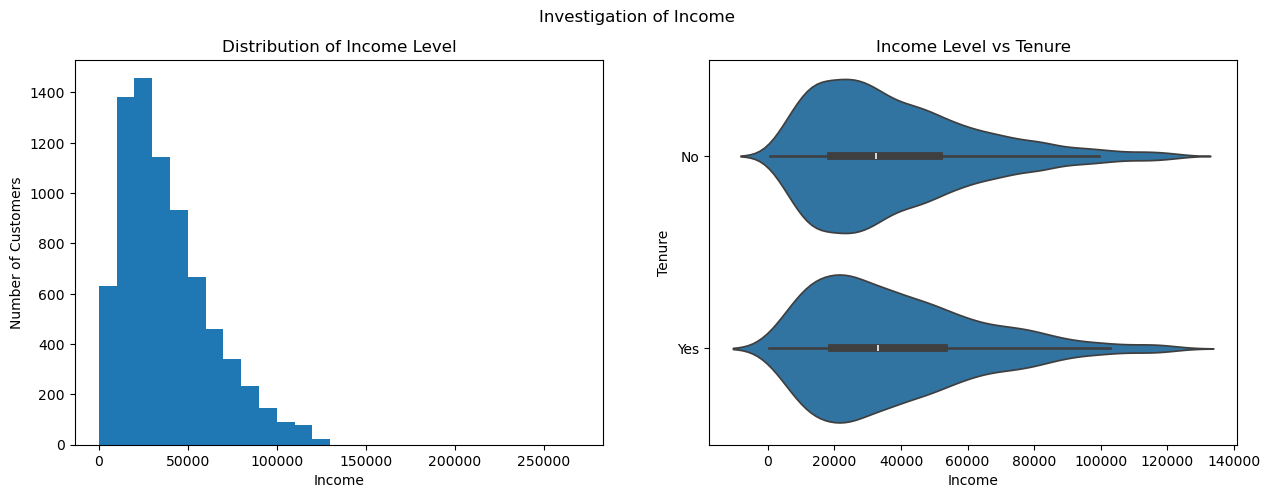

In [24]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Income")
plt.subplot(1,2,1)
plt.title("Distribution of Income Level")
bins = np.arange(0,275000,10000)
plt.hist(data=data, x="Income", bins=bins)
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Income Level vs Tenure")
sns.violinplot(data=data, x="Income", y="Churn", orient="h")
plt.xlabel("Income")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

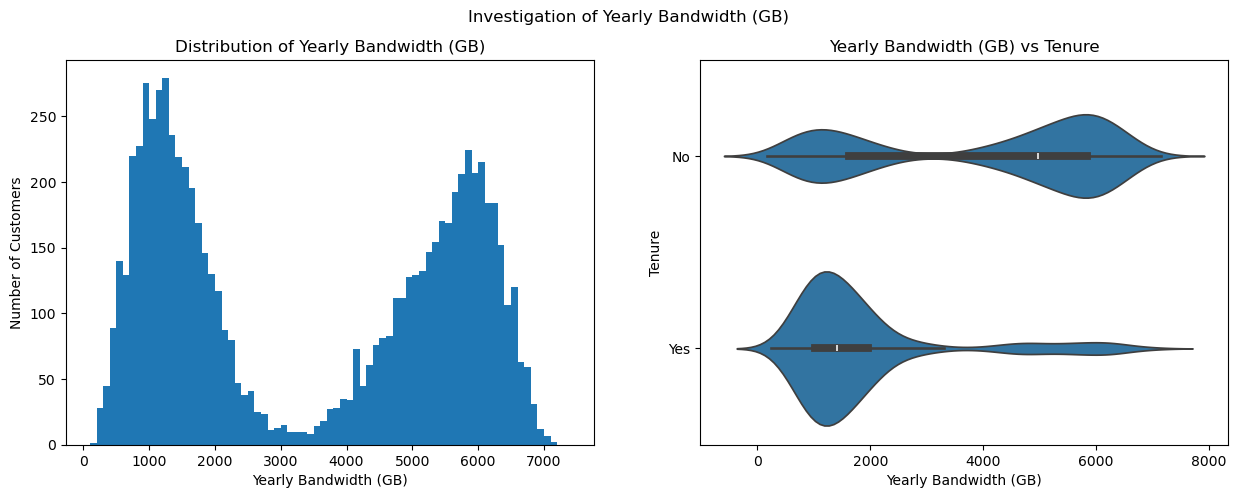

In [25]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Yearly Bandwidth (GB)")
plt.subplot(1,2,1)
plt.title("Distribution of Yearly Bandwidth (GB)")
bins = np.arange(100,7500,100)
plt.hist(data=data, x="Bandwidth_GB_Year", bins=bins)
plt.xlabel("Yearly Bandwidth (GB)")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Yearly Bandwidth (GB) vs Tenure")
sns.violinplot(data=data, x="Bandwidth_GB_Year", y="Churn", orient="h")
plt.xlabel("Yearly Bandwidth (GB)")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

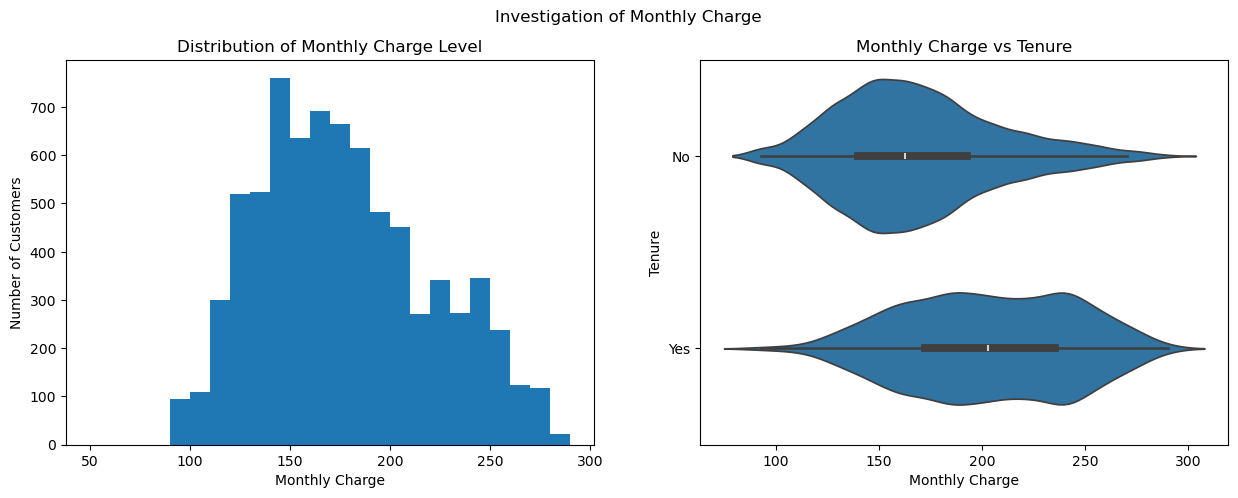

In [26]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Monthly Charge")
plt.subplot(1,2,1)
plt.title("Distribution of Monthly Charge Level")
bins = np.arange(50,300,10)
plt.hist(data=data, x="MonthlyCharge", bins=bins)
plt.xlabel("Monthly Charge")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Monthly Charge vs Tenure")
sns.violinplot(data=data, x="MonthlyCharge", y="Churn", orient = "h")
plt.xlabel("Monthly Charge")
plt.ylabel("Tenure")

<Axes: title={'center': 'Age vs Tenure'}, xlabel='Age', ylabel='Churn'>

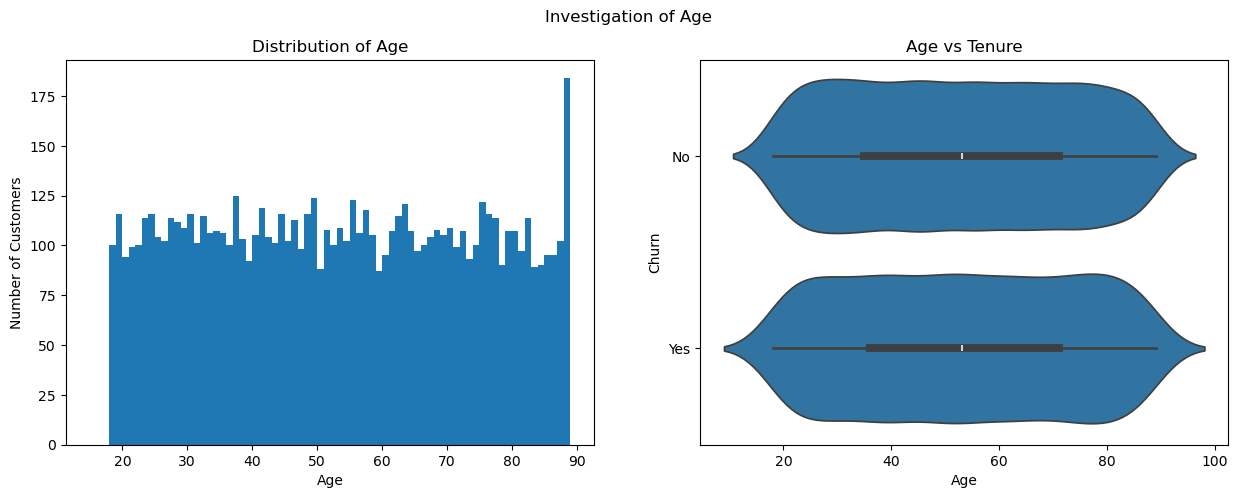

In [27]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Age")
plt.subplot(1,2,1)
plt.title("Distribution of Age")
bins = np.arange(15,90,1)
plt.hist(data=data, x="Age", bins=bins)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Age vs Tenure")
sns.violinplot(data=data, x="Age", y="Churn", orient = "h")

<Axes: title={'center': 'Outage Seconds Per Week vs Tenure'}, xlabel='Outage_sec_perweek', ylabel='Churn'>

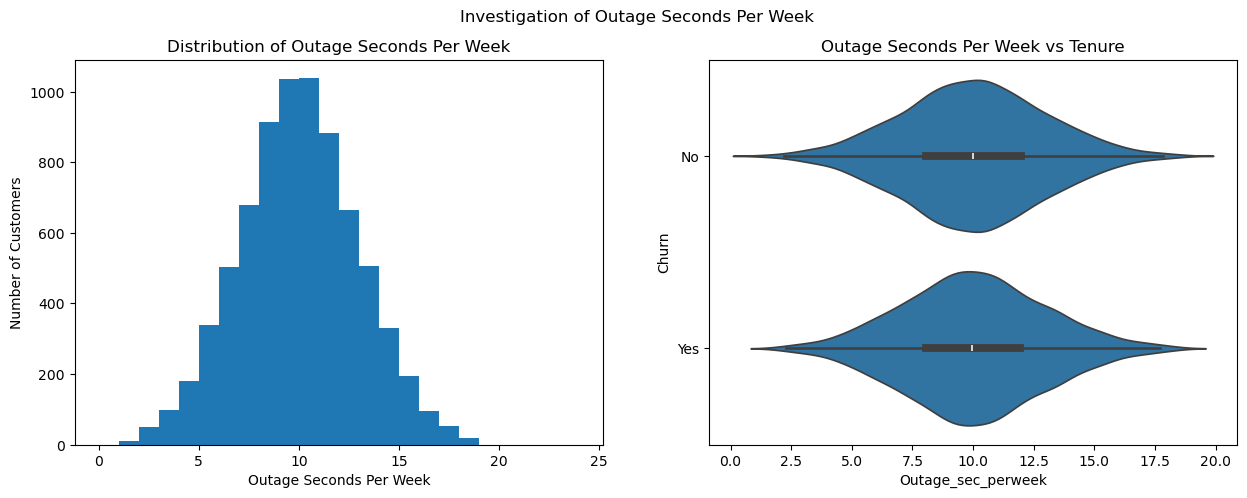

In [28]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Outage Seconds Per Week")
plt.subplot(1,2,1)
plt.title("Distribution of Outage Seconds Per Week")
bins = np.arange(0,25,1)
plt.hist(data=data, x="Outage_sec_perweek", bins=bins)
plt.xlabel("Outage Seconds Per Week")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Outage Seconds Per Week vs Tenure")
sns.violinplot(data=data, x="Outage_sec_perweek", y="Churn", orient = "h")

<Axes: title={'center': 'Children vs Tenure'}, xlabel='Children', ylabel='count'>

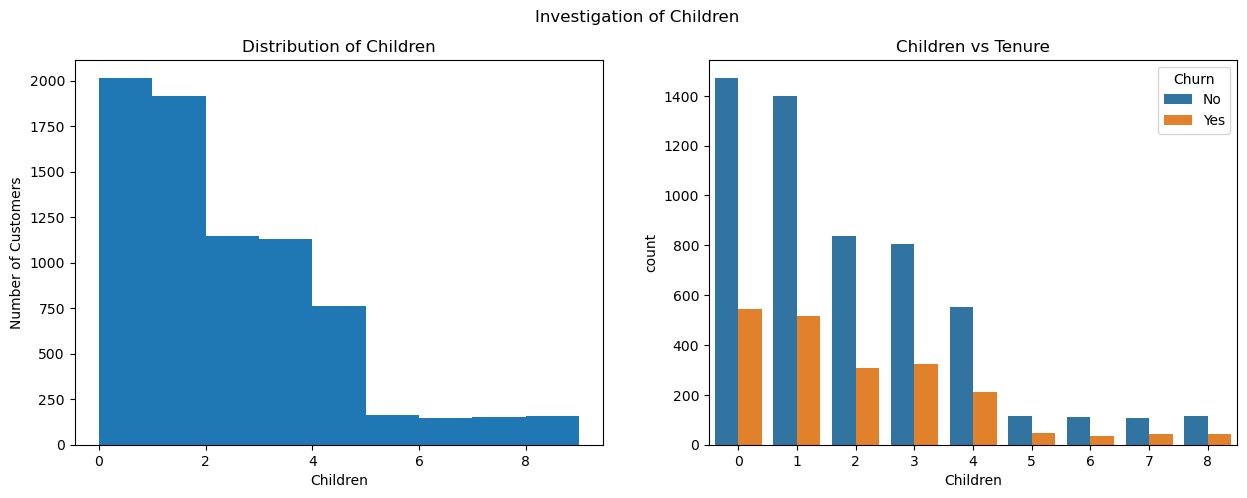

In [29]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Children")
plt.subplot(1,2,1)
plt.title("Distribution of Children")
bins = np.arange(0,10,1)
plt.hist(data=data, x="Children", bins=bins)
plt.xlabel("Children")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Children vs Tenure")
sns.countplot(data=data, x="Children", hue="Churn")

Text(0, 0.5, 'Tenure')

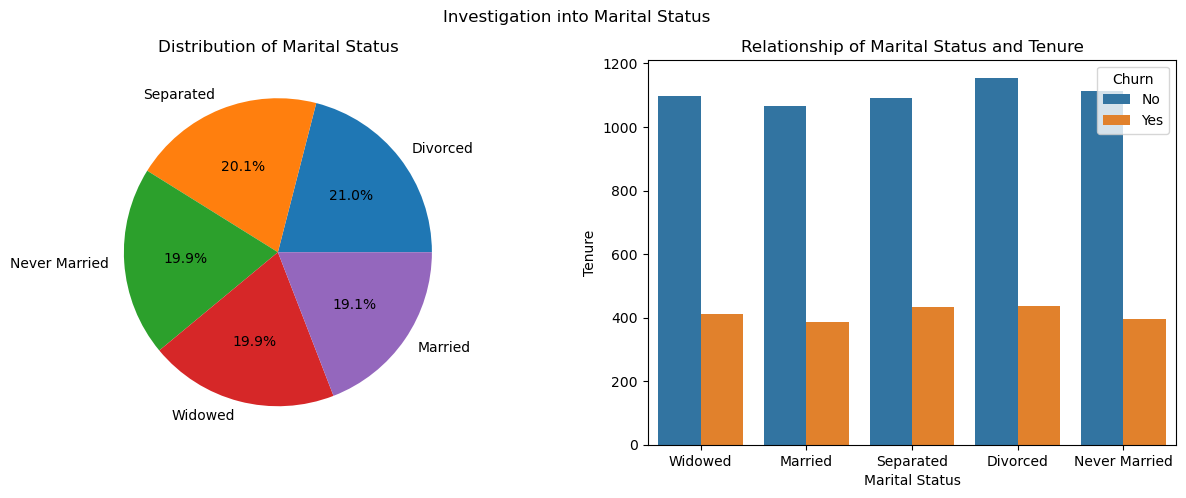

In [30]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Marital Status")
plt.subplot(1,2,1)
plt.title("Distribution of Marital Status")
marital_status = data["Marital"].value_counts()
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Marital Status and Tenure")
sns.countplot(data = data, x="Marital", hue="Churn")
plt.xlabel("Marital Status")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

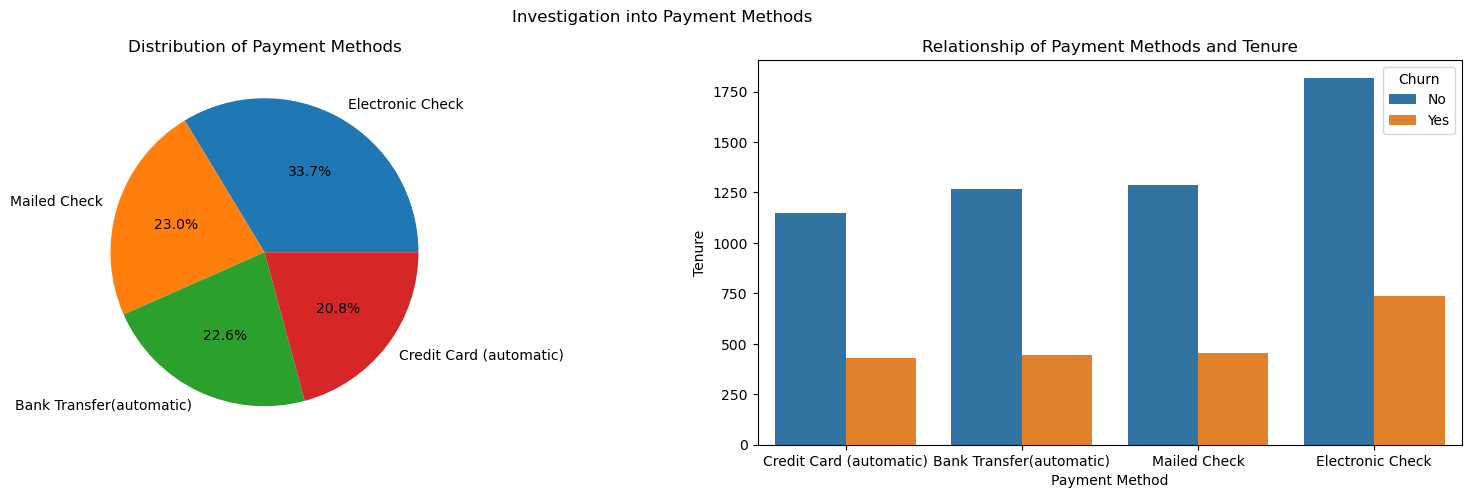

In [31]:
plt.figure(figsize=[20,5])
plt.suptitle("Investigation into Payment Methods")
plt.subplot(1,2,1)
plt.title("Distribution of Payment Methods")
payment_method = data["PaymentMethod"].value_counts()
plt.pie(payment_method, labels=payment_method.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Payment Methods and Tenure")
sns.countplot(data = data, x="PaymentMethod", hue="Churn")
plt.xlabel("Payment Method")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

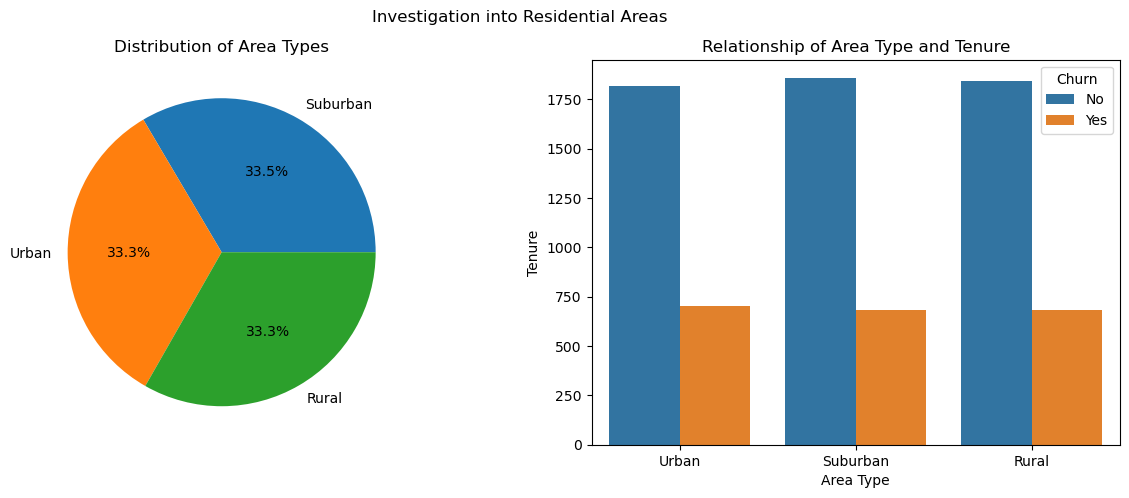

In [32]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Residential Areas")
plt.subplot(1,2,1)
plt.title("Distribution of Area Types")
area_type = data["Area"].value_counts()
plt.pie(area_type, labels=area_type.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Area Type and Tenure")
sns.countplot(data = data, x="Area", hue="Churn")
plt.xlabel("Area Type")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

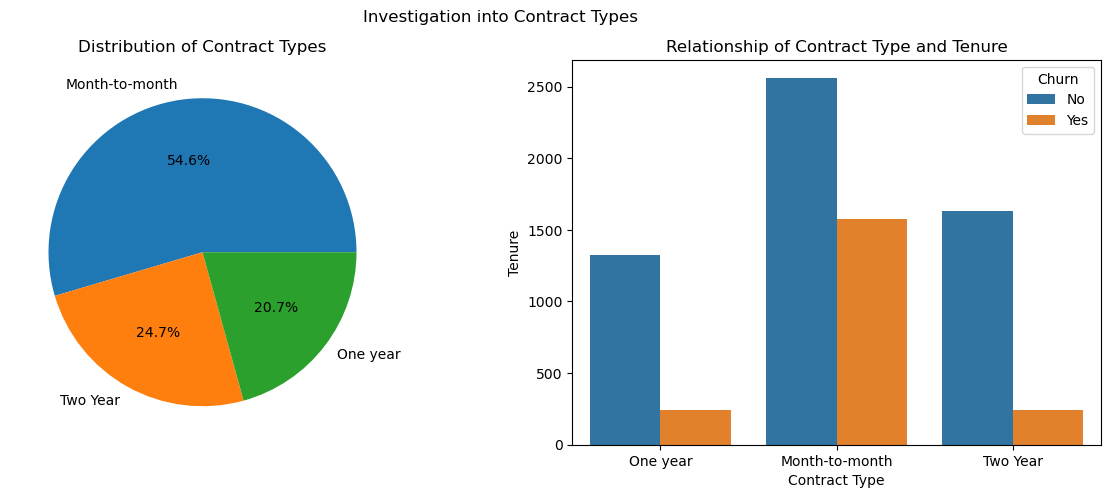

In [33]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Contract Types")
plt.subplot(1,2,1)
plt.title("Distribution of Contract Types")
contract_type = data["Contract"].value_counts()
plt.pie(contract_type, labels=contract_type.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Contract Type and Tenure")
sns.countplot(data = data, x="Contract", hue="Churn")
plt.xlabel("Contract Type")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

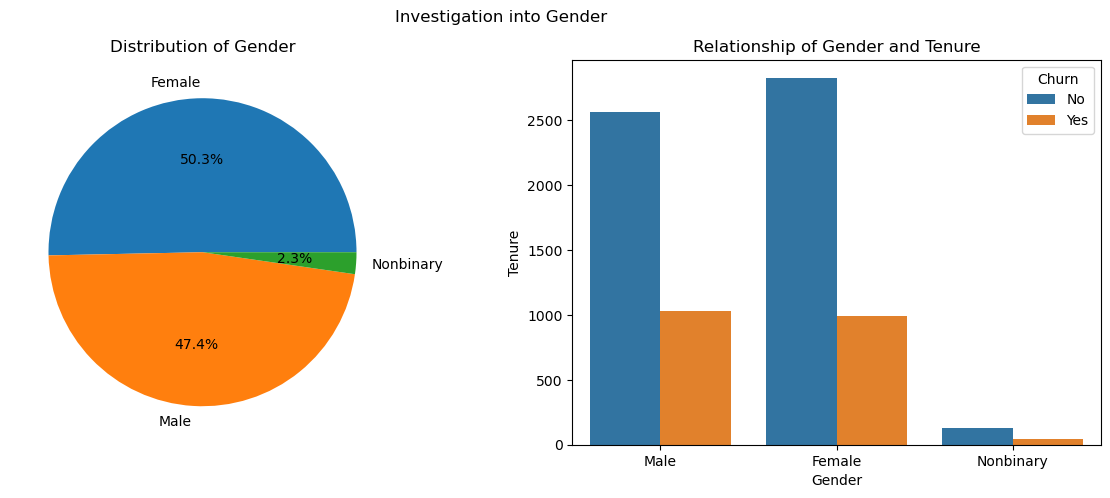

In [34]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Gender")
plt.subplot(1,2,1)
plt.title("Distribution of Gender")
client_gender = data["Gender"].value_counts()
plt.pie(client_gender, labels=client_gender.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Gender and Tenure")
sns.countplot(data = data, x="Gender", hue="Churn")
plt.xlabel("Gender")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

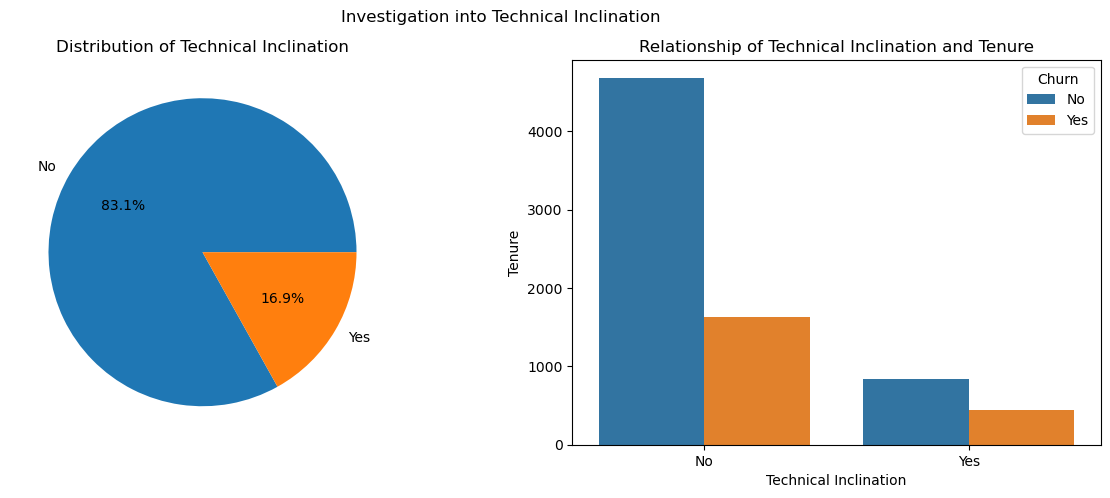

In [35]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Technical Inclination")
plt.subplot(1,2,1)
plt.title("Distribution of Technical Inclination")
client_tech = data["Techie"].value_counts()
plt.pie(client_tech, labels=client_tech.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Technical Inclination and Tenure")
sns.countplot(data = data, x="Techie", hue="Churn")
plt.xlabel("Technical Inclination")
plt.ylabel("Tenure")

##### 4: Data transformation goals
All columns containing categorical data still require data transformation. Techie is a column that only needs the data type to be converted, from the string values to 1 or 0. For all other categorical data, though, they need to be split into multiple columns that provide the information as to what the entry is. To take one example, the contract column will be converted into a yearcontract column, a twoyearcontract column, and a month_to_month column, each of which containing only 0 and 1 as values, for true and false

In [36]:
data["Techie"] = data["Techie"].apply(lambda x: 0 if x == "Yes" else 1)
data['Area'] = data['Area'].astype("category")
data['Marital'] = data.Marital.astype('category')
data.Gender = data.Gender.astype('category')
data.Contract = data.Contract.astype('category')
data.PaymentMethod = data.PaymentMethod.astype('category')
data = pd.get_dummies(data, columns=['Gender', 'Area', 'Marital', 'Contract', 'PaymentMethod', 'Techie'], dtype=int)
data["Churn"] = data["Churn"].apply(lambda x: 0 if x == "Yes" else 1)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7584 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Children                                7584 non-null   int64  
 1   Age                                     7584 non-null   int64  
 2   Income                                  7584 non-null   float64
 3   Churn                                   7584 non-null   int64  
 4   Outage_sec_perweek                      7584 non-null   float64
 5   Tenure                                  7584 non-null   float64
 6   MonthlyCharge                           7584 non-null   float64
 7   Bandwidth_GB_Year                       7584 non-null   float64
 8   Gender_Female                           7584 non-null   int64  
 9   Gender_Male                             7584 non-null   int64  
 10  Gender_Nonbinary                        7584 non-null   int64  
 

##### 5: CSV Export
See attached csv for the cleaned and transformed data

In [37]:
data.to_csv('./D208CleanedData.csv')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7584 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Children                                7584 non-null   int64  
 1   Age                                     7584 non-null   int64  
 2   Income                                  7584 non-null   float64
 3   Churn                                   7584 non-null   int64  
 4   Outage_sec_perweek                      7584 non-null   float64
 5   Tenure                                  7584 non-null   float64
 6   MonthlyCharge                           7584 non-null   float64
 7   Bandwidth_GB_Year                       7584 non-null   float64
 8   Gender_Female                           7584 non-null   int64  
 9   Gender_Male                             7584 non-null   int64  
 10  Gender_Nonbinary                        7584 non-null   int64  
 

<h4>D: Initial and Reduced Logistic Regression Model</h4>
<h5>1: Initial Multiple Logistic Regression Model</h5>

In [39]:
x = data[['Gender_Male', 'Gender_Female', 'Gender_Nonbinary', 'Area_Urban', 'Area_Suburban', 'Area_Rural', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Marital_Married', 'Contract_One year', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Mailed Check','Techie_0', 'Techie_1',  'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']]
vif = pd.DataFrame()
vif["Factor"] = x.columns
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif)

                                    Factor       vif
0                              Gender_Male       inf
1                            Gender_Female       inf
2                         Gender_Nonbinary       inf
3                               Area_Urban       inf
4                            Area_Suburban       inf
5                               Area_Rural       inf
6                         Marital_Divorced       inf
7                          Marital_Widowed       inf
8                        Marital_Separated       inf
9                    Marital_Never Married       inf
10                         Marital_Married       inf
11                       Contract_One year       inf
12                       Contract_Two Year       inf
13                 Contract_Month-to-month       inf
14          PaymentMethod_Electronic Check       inf
15   PaymentMethod_Credit Card (automatic)       inf
16  PaymentMethod_Bank Transfer(automatic)       inf
17              PaymentMethod_Mailed Check    

/home/edwinp/.conda/envs/Class/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide


In [40]:
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Area_Suburban',  'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Mailed Check','Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']]
vif = pd.DataFrame()
vif["Factor"] = x.columns
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif)

                                    Factor        vif
0                              Gender_Male  12.854237
1                            Gender_Female  13.531449
2                               Area_Urban   1.972952
3                            Area_Suburban   1.978571
4                         Marital_Divorced   2.051653
5                          Marital_Widowed   1.985356
6                        Marital_Separated   2.006081
7                    Marital_Never Married   1.985993
8                        Contract_Two Year   2.138781
9                  Contract_Month-to-month   3.503115
10          PaymentMethod_Electronic Check   2.528673
11  PaymentMethod_Bank Transfer(automatic)   2.029336
12              PaymentMethod_Mailed Check   2.057125
13                                Techie_0   1.203843
14                                Children   2.015725
15                                     Age   7.198641
16                                  Income   3.278419
17                      Outa

In [41]:
y = data['Churn']
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Area_Suburban',  'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Mailed Check','Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']]
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.300119
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7563
Method:                           MLE   Df Model:                           20
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:55   Log-Likelihood:                -2276.1
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      8.2958   

##### 2: Justifying a Statistically Based Feature Selection Procedure
We previously establish, multicolinearity can cause issues, so a reduction in the features is justified to ensure that multicollinearity is not impacting this model. Therefore, we will be using backward stepwise elimination to remove the variable with the highest p-value over a threshold of 0.05. This will be repeated until every variable has a p-value of <0.05

In [42]:
y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Area_Suburban',  'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Mailed Check','Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300119
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7563
Method:                           MLE   Df Model:                           20
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:55   Log-Likelihood:                -2276.1
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.5362   

In [43]:
y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Area_Suburban',  'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300119
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7564
Method:                           MLE   Df Model:                           19
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:55   Log-Likelihood:                -2276.1
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.5361   

In [44]:
y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300119
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7565
Method:                           MLE   Df Model:                           18
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:55   Log-Likelihood:                -2276.1
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.5363   

In [45]:
y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300123
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7566
Method:                           MLE   Df Model:                           17
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:55   Log-Likelihood:                -2276.1
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.5375   

In [46]:
y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300138
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7567
Method:                           MLE   Df Model:                           16
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:55   Log-Likelihood:                -2276.2
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.5358   

In [47]:
y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300152
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7568
Method:                           MLE   Df Model:                           15
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:55   Log-Likelihood:                -2276.4
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.5382   

In [48]:
y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300170
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7569
Method:                           MLE   Df Model:                           14
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4873
Time:                        12:43:55   Log-Likelihood:                -2276.5
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.5411   

In [49]:
y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300238
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7570
Method:                           MLE   Df Model:                           13
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4872
Time:                        12:43:55   Log-Likelihood:                -2277.0
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.2960   

In [50]:
y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Marital_Separated',  'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300294
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7571
Method:                           MLE   Df Model:                           12
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4871
Time:                        12:43:55   Log-Likelihood:                -2277.4
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.2952   

In [51]:
y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Marital_Separated',  'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300364
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7572
Method:                           MLE   Df Model:                           11
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4870
Time:                        12:43:55   Log-Likelihood:                -2278.0
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender_Male                       -0.2944      0.075     -3.917     

In [52]:
y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Marital_Separated',  'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children', 'Age', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300446
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7573
Method:                           MLE   Df Model:                           10
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4869
Time:                        12:43:55   Log-Likelihood:                -2278.6
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender_Male                       -0.2906      0.075     -3.872     

In [53]:
y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children', 'Age', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300535
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7574
Method:                           MLE   Df Model:                            9
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4867
Time:                        12:43:55   Log-Likelihood:                -2279.3
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender_Male                       -0.2889      0.075     -3.851     

In [54]:
y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children','MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300635
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7575
Method:                           MLE   Df Model:                            8
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4865
Time:                        12:43:55   Log-Likelihood:                -2280.0
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender_Male                       -0.2885      0.075     -3.846     

In [55]:
y = data.Churn
x = data[['Gender_Male', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children','MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.300795
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7576
Method:                           MLE   Df Model:                            7
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4863
Time:                        12:43:55   Log-Likelihood:                -2281.2
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender_Male                       -0.2859      0.075     -3.812     

In [56]:
y = data.Churn
x = data[['Gender_Male', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.301184
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7577
Method:                           MLE   Df Model:                            6
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4856
Time:                        12:43:55   Log-Likelihood:                -2284.2
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender_Male                       -0.2861      0.075     -3.817     

This last model is our final model for the logistic regression, as all p-values have fallen to 0, beneath the threshold of 0.05.This model is slightly improved, as can be seen from the change in the pseudo R-squ value from 0.4874 to 0.4856
##### 3: Reduced Logistic Regression Model
A large number of our variables were removed. The variables were as follows:
<ul>
    <li>Area</li>
    <li>Marital</li>
    <li>Outage_sec_perweek</li>
    <li>Income</li>
    <li>Age</li>
    <li>Children</li>
</ul>
The remaining independent variables are as follows:
<ul>
    <li>Gender_Male</li>
    <li>Contract_Month_to_month</li>
    <li>PaymentMethod_Electronic Check</li>
    <li>Techie</li>
    <li>MonthlyCharge</li>
    <li>Bandwidth_GB_Year</li>
</ul>
All of these influence the only dependent variable of Churn

In [57]:
data = data[['Churn', 'Gender_Male', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'MonthlyCharge', 'Bandwidth_GB_Year']] 
y = data.Churn
x = data[['Gender_Male', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.301184
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7577
Method:                           MLE   Df Model:                            6
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4856
Time:                        12:43:55   Log-Likelihood:                -2284.2
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender_Male                       -0.2861      0.075     -3.817     

###### <a id="E"></a>
#### E: Analyzing Dataset
##### 1: Explanation of Data Analysis Procedure
The initial multiple logistic regression model had a large number of variables, the majority of which having no value to the model itself. After the variables with p-values above 0.05 were removed, the model reduced the overall number of dependent in it from 26 to 6. With these, we see a correlation with the churn without needing to worry about the multicolinearity of the variables influencing or biasing the results

##### 2: Output and Calculations

<Axes: xlabel='MonthlyCharge', ylabel='Churn'>

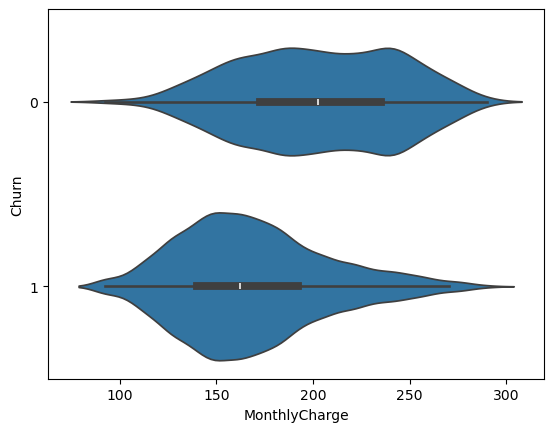

In [58]:
sns.violinplot(x='MonthlyCharge', y="Churn", data=data, orient = "h")

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Churn'>

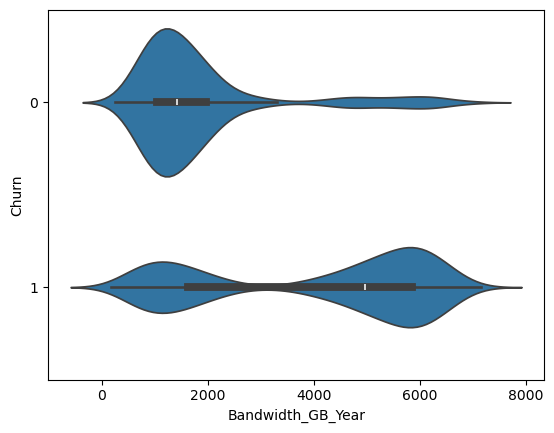

In [59]:
sns.violinplot(x='Bandwidth_GB_Year', y="Churn", orient="h", data=data)

Text(0, 0.5, 'Count')

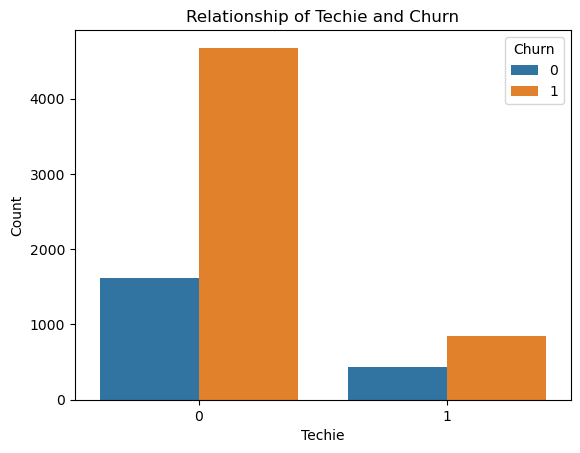

In [60]:
plt.title("Relationship of Techie and Churn")
sns.countplot(data = data, x="Techie_0", hue="Churn")
plt.xlabel("Techie")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

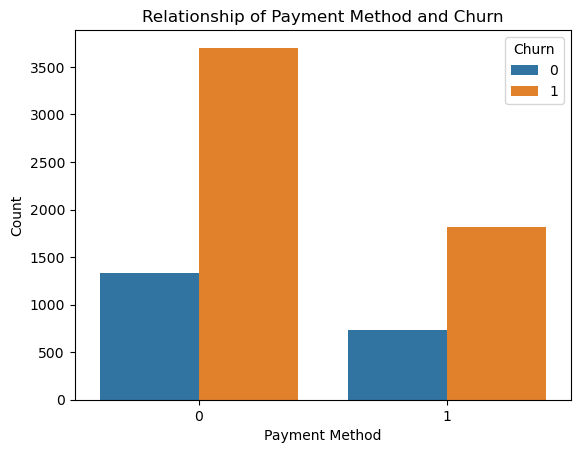

In [61]:
plt.title("Relationship of Payment Method and Churn")
sns.countplot(data = data, x='PaymentMethod_Electronic Check', hue="Churn")
plt.xlabel("Payment Method")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

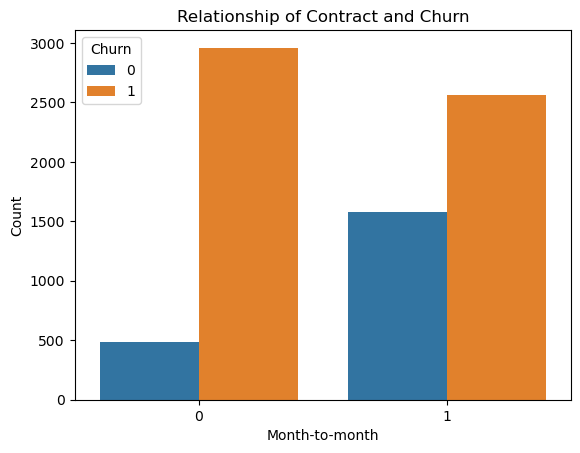

In [62]:
plt.title("Relationship of Contract and Churn")
sns.countplot(data = data, x='Contract_Month-to-month', hue="Churn")
plt.xlabel("Month-to-month")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

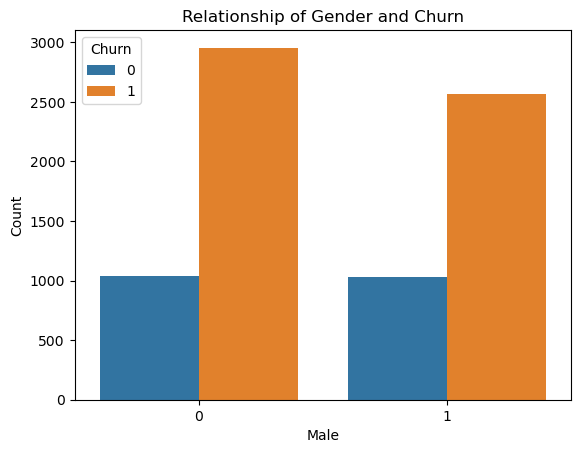

In [63]:
plt.title("Relationship of Gender and Churn")
sns.countplot(data = data, x='Gender_Male', hue="Churn")
plt.xlabel("Male")
plt.ylabel("Count")

A copy of the code used, without markdown cells or visualizations, can be found below

<class 'pandas.core.frame.DataFrame'>
Index: 7584 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                7584 non-null   object 
 1   Children            7584 non-null   int64  
 2   Age                 7584 non-null   int64  
 3   Income              7584 non-null   float64
 4   Marital             7584 non-null   object 
 5   Gender              7584 non-null   object 
 6   Churn               7584 non-null   object 
 7   Outage_sec_perweek  7584 non-null   float64
 8   Techie              7584 non-null   object 
 9   Contract            7584 non-null   object 
 10  PaymentMethod       7584 non-null   object 
 11  Tenure              7584 non-null   float64
 12  MonthlyCharge       7584 non-null   float64
 13  Bandwidth_GB_Year   7584 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 888.8+ KB


/tmp/ipykernel_1067/1487185428.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/tmp/ipykernel_1067/1487185428.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or 

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Techie,Contract,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,0,68,28561.99,Widowed,Male,No,7.978323,No,One year,Credit Card (automatic),6.795513,172.455519,904.536110
1,Urban,1,27,21704.77,Married,Female,Yes,11.699080,Yes,Month-to-month,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,Urban,4,50,9609.57,Widowed,Female,No,10.752800,Yes,Two Year,Credit Card (automatic),15.754144,159.947583,2054.706961
3,Suburban,1,48,18925.23,Married,Male,No,14.913540,Yes,Two Year,Mailed Check,17.087227,119.956840,2164.579412
4,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,No,Month-to-month,Mailed Check,1.670972,149.948316,271.493436


         Current function value: 0.300119
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7563
Method:                           MLE   Df Model:                           20
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:57   Log-Likelihood:                -2276.1
converged:                      False   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.2913        nan        nan        nan      

/home/edwinp/.conda/envs/Class/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/home/edwinp/.conda/envs/Class/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide


                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7564
Method:                           MLE   Df Model:                           19
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4874
Time:                        12:43:58   Log-Likelihood:                -2276.1
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender_Male                               -0.5361      0.254     -2.106      0.035      -1.035      -0.037
Gender_Female                             -0.25

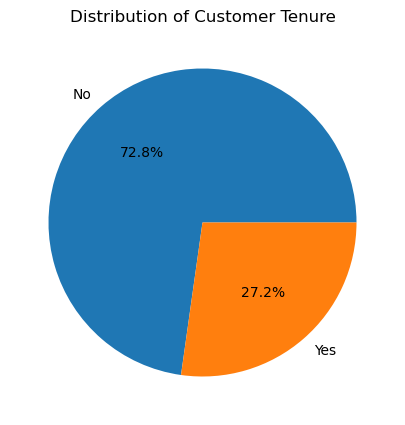

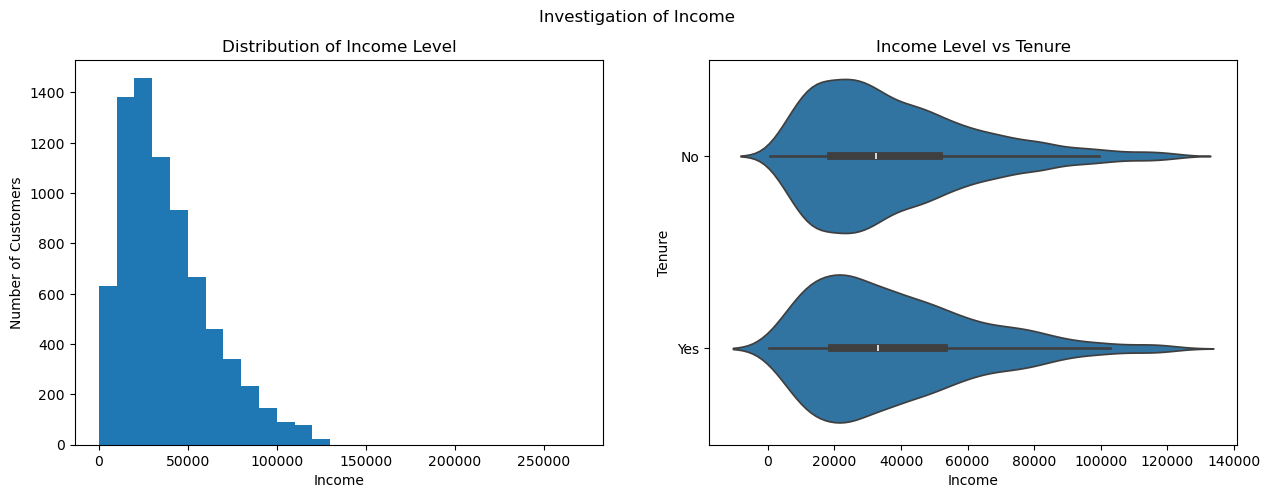

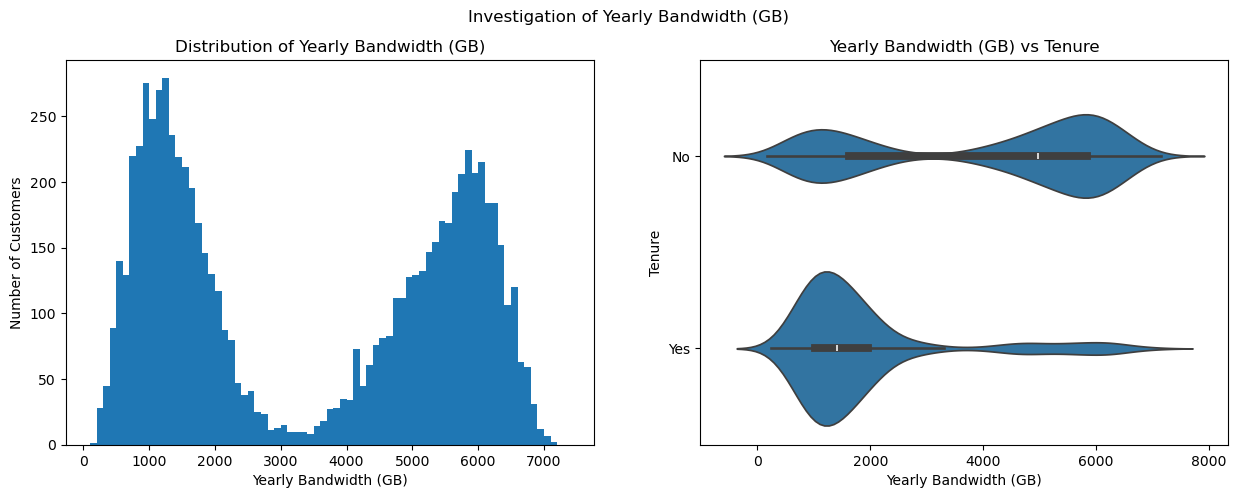

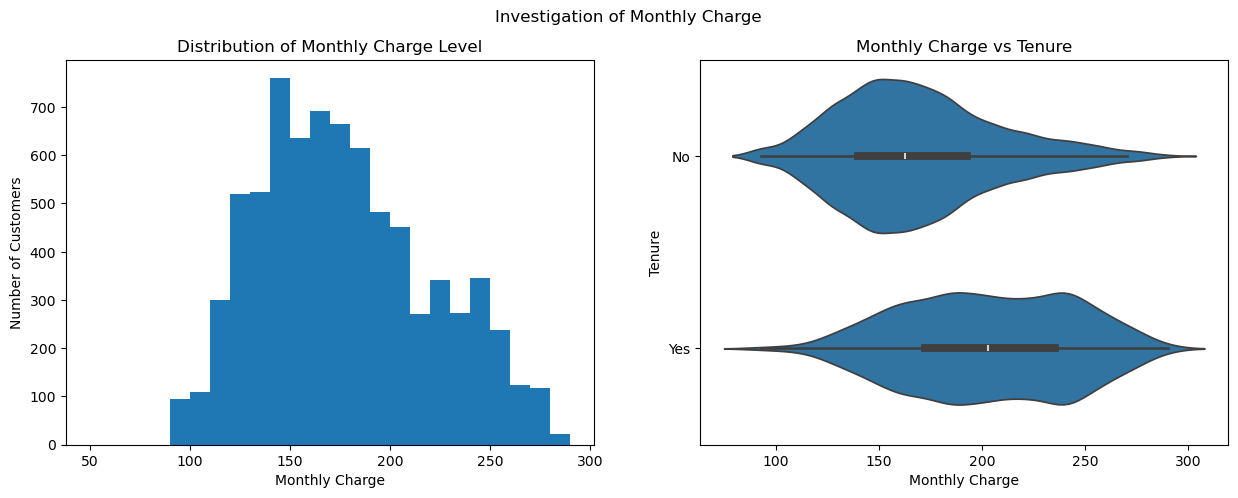

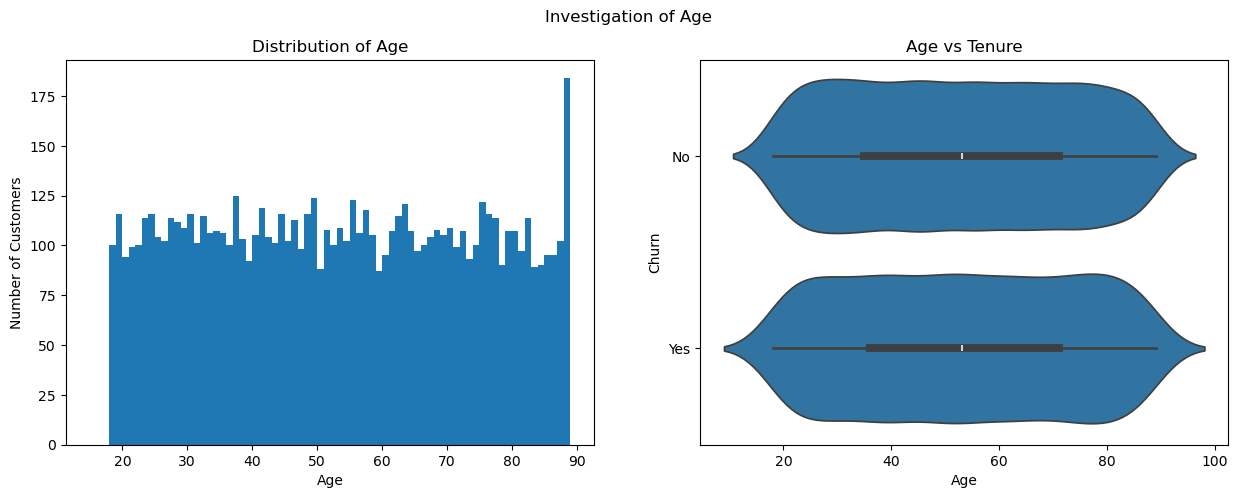

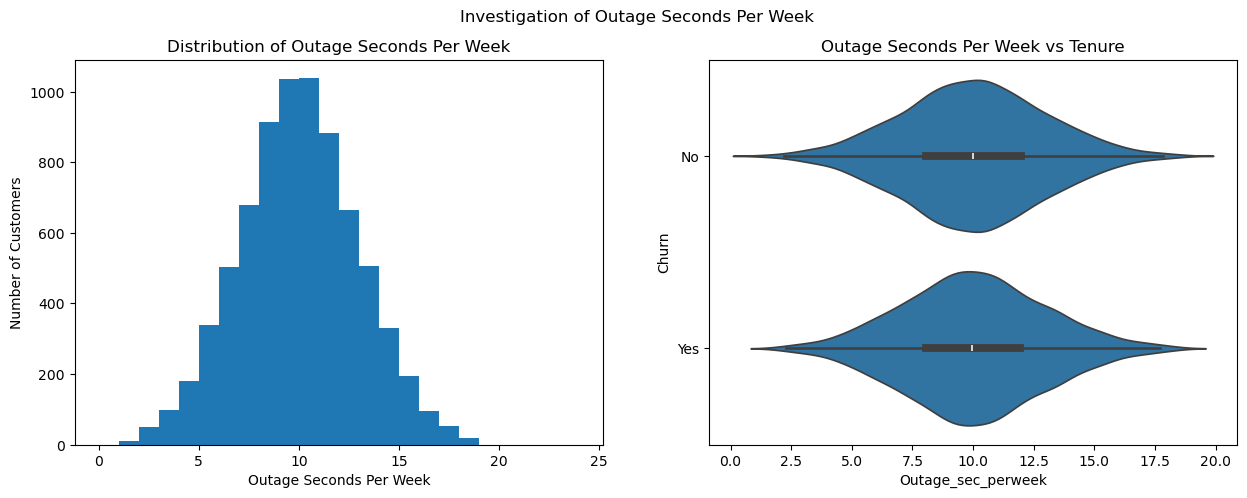

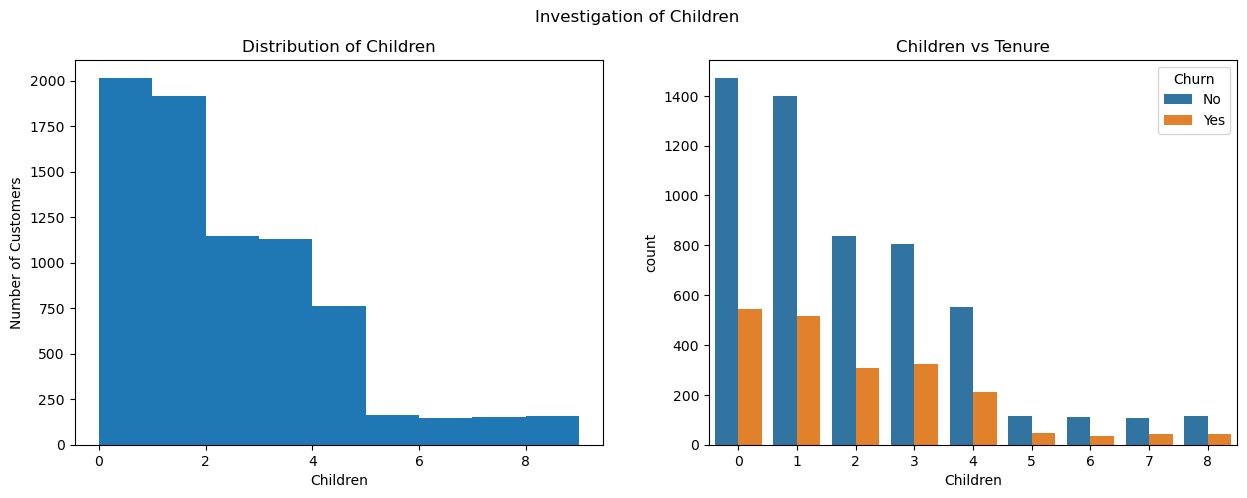

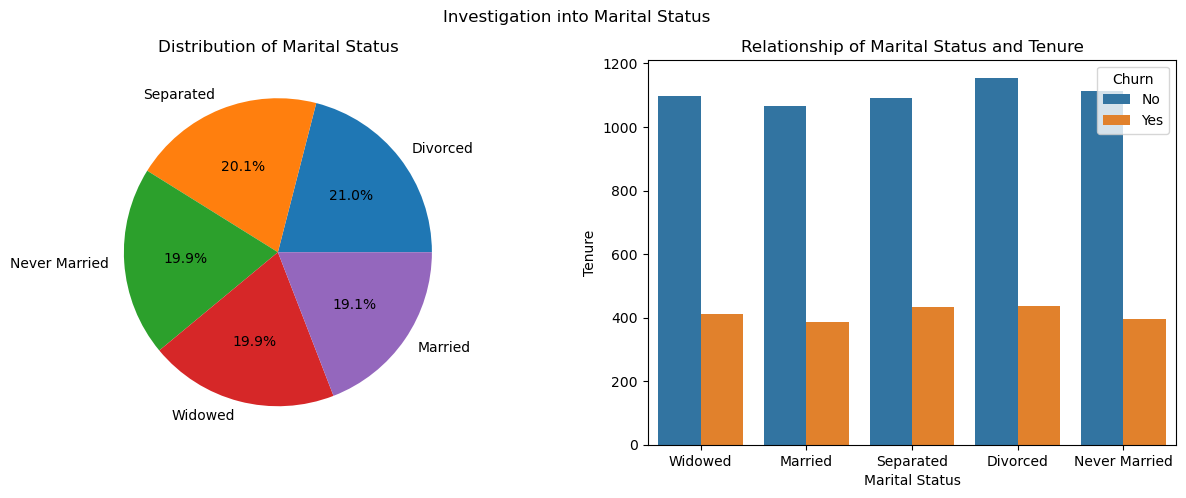

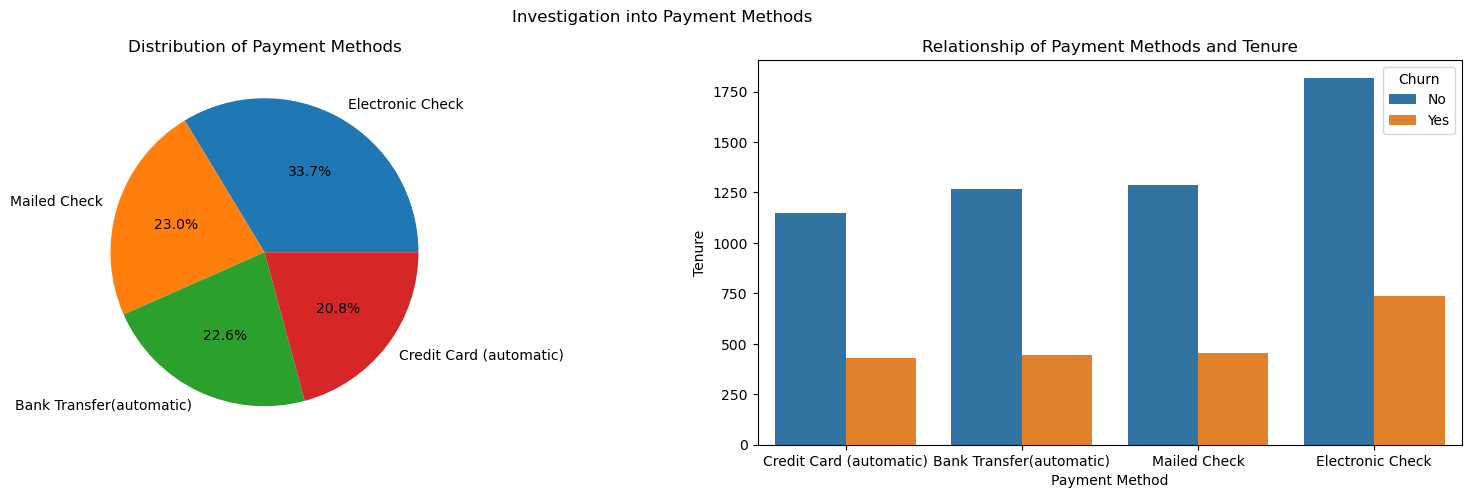

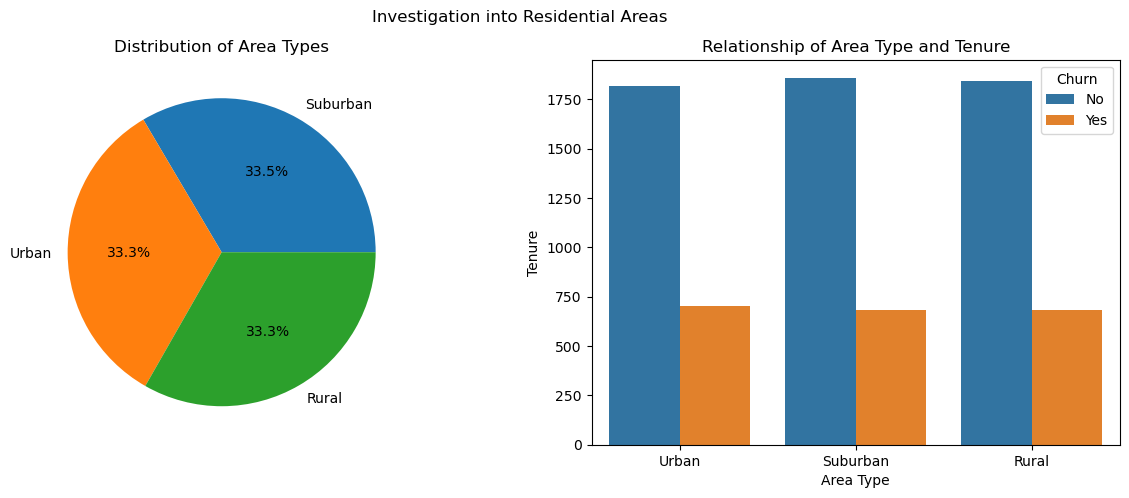

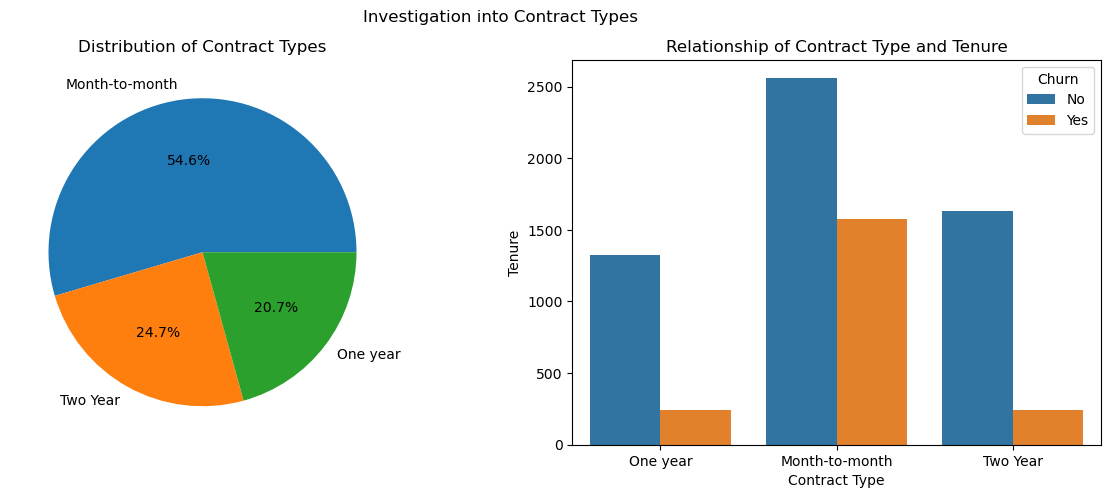

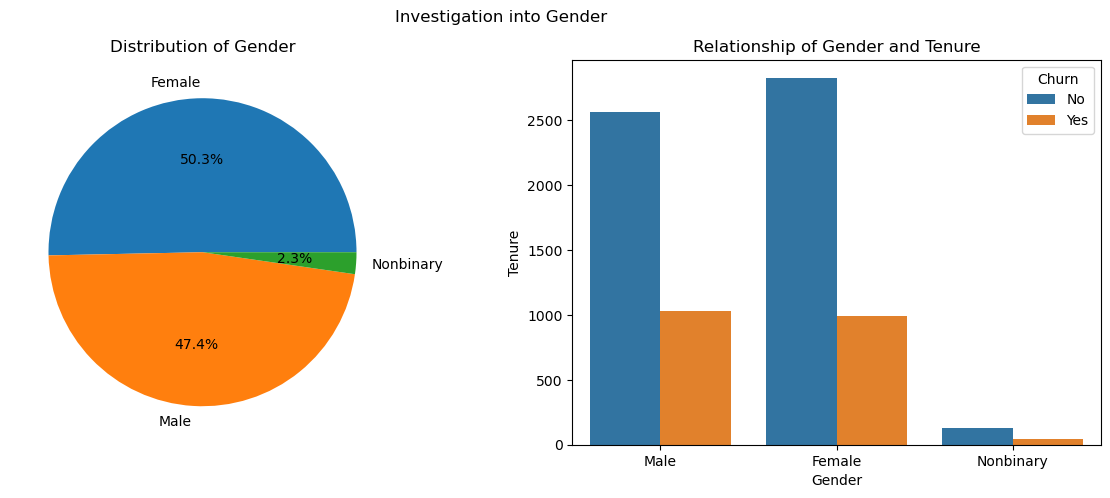

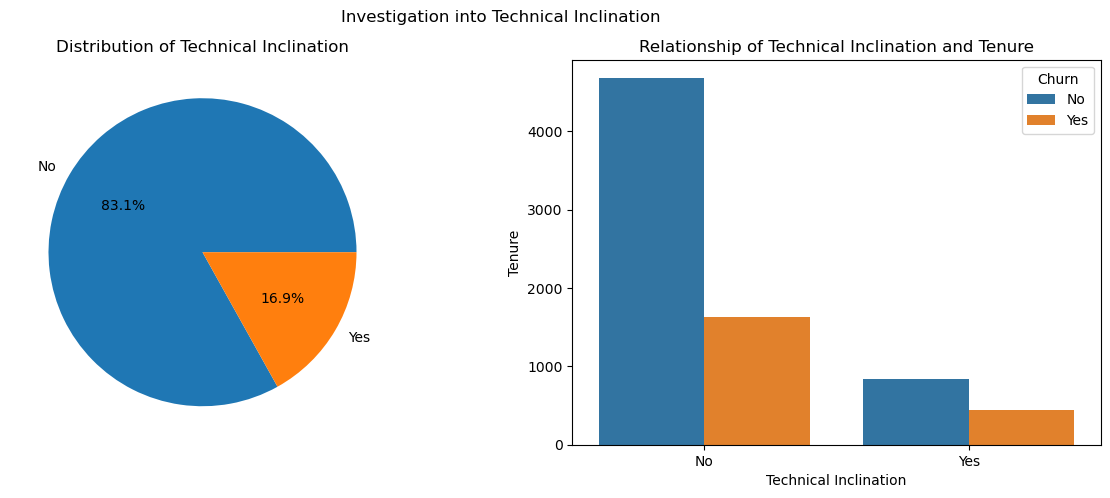

In [64]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotnine as p9
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = pd.read_csv("/home/edwinp/Downloads/d9rkejv84kd9rk30fi2l/churn_clean.csv")
pd.set_option("display.max_columns", None)

data['Income'].fillna(data['Income'].median(), inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)
data["MonthlyCharge"].fillna(data["MonthlyCharge"].median(), inplace=True)
data["Outage_sec_perweek"].fillna(data["Outage_sec_perweek"].median(), inplace=True)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Children"].fillna(data["Children"].median(), inplace=True)
data.dropna(how='any',inplace=True)
data.drop_duplicates(subset=['Customer_id'])
zscores = stats.zscore(data['Income'])
data['IncomeZScore'] = zscores
zscores = stats.zscore(data['Tenure'])
data['TenureZScore'] = zscores
zscores = stats.zscore(data['MonthlyCharge'])
data['MonthlyChargeZScore'] = zscores
zscores = stats.zscore(data['Outage_sec_perweek'])
data['Outage_sec_perweekZScore'] = zscores
zscores = stats.zscore(data['Age'])
data['AgeZScore'] = zscores
zscores = stats.zscore(data['Children'])
data['ChildrenZScore'] = zscores
data = data.query("(IncomeZScore < 3 & IncomeZScore > -3) & (TenureZScore < 3 & TenureZScore > -3) & (MonthlyChargeZScore < 3 & MonthlyChargeZScore > -3) & (Outage_sec_perweekZScore < 3 & Outage_sec_perweekZScore > -3) & (AgeZScore < 3 & AgeZScore > -3) & (ChildrenZScore < 3 & ChildrenZScore > -3)")

data = data.drop(["IncomeZScore", 'TenureZScore', 'MonthlyChargeZScore', 'Outage_sec_perweekZScore', 'AgeZScore', 'ChildrenZScore', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Email', 'Contacts', 'Yearly_equip_failure', 'Population', 'PaperlessBilling', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
data.info()

display(data.head())

plt.figure(figsize= [15,5])
plt.title("Distribution of Customer Tenure")
churn = data["Churn"].value_counts()
plt.pie(churn, labels=churn.index, autopct='%1.1f%%')

plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Income")
plt.subplot(1,2,1)
plt.title("Distribution of Income Level")
bins = np.arange(0,275000,10000)
plt.hist(data=data, x="Income", bins=bins)
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Income Level vs Tenure")
sns.violinplot(data=data, x="Income", y="Churn", orient="h")
plt.xlabel("Income")
plt.ylabel("Tenure")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Yearly Bandwidth (GB)")
plt.subplot(1,2,1)
plt.title("Distribution of Yearly Bandwidth (GB)")
bins = np.arange(100,7500,100)
plt.hist(data=data, x="Bandwidth_GB_Year", bins=bins)
plt.xlabel("Yearly Bandwidth (GB)")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Yearly Bandwidth (GB) vs Tenure")
sns.violinplot(data=data, x="Bandwidth_GB_Year", y="Churn", orient="h")
plt.xlabel("Yearly Bandwidth (GB)")
plt.ylabel("Tenure")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Monthly Charge")
plt.subplot(1,2,1)
plt.title("Distribution of Monthly Charge Level")
bins = np.arange(50,300,10)
plt.hist(data=data, x="MonthlyCharge", bins=bins)
plt.xlabel("Monthly Charge")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Monthly Charge vs Tenure")
sns.violinplot(data=data, x="MonthlyCharge", y="Churn", orient = "h")
plt.xlabel("Monthly Charge")
plt.ylabel("Tenure")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Age")
plt.subplot(1,2,1)
plt.title("Distribution of Age")
bins = np.arange(15,90,1)
plt.hist(data=data, x="Age", bins=bins)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Age vs Tenure")
sns.violinplot(data=data, x="Age", y="Churn", orient = "h")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Outage Seconds Per Week")
plt.subplot(1,2,1)
plt.title("Distribution of Outage Seconds Per Week")
bins = np.arange(0,25,1)
plt.hist(data=data, x="Outage_sec_perweek", bins=bins)
plt.xlabel("Outage Seconds Per Week")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Outage Seconds Per Week vs Tenure")
sns.violinplot(data=data, x="Outage_sec_perweek", y="Churn", orient = "h")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Children")
plt.subplot(1,2,1)
plt.title("Distribution of Children")
bins = np.arange(0,10,1)
plt.hist(data=data, x="Children", bins=bins)
plt.xlabel("Children")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Children vs Tenure")
sns.countplot(data=data, x="Children", hue="Churn")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Marital Status")
plt.subplot(1,2,1)
plt.title("Distribution of Marital Status")
marital_status = data["Marital"].value_counts()
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Marital Status and Tenure")
sns.countplot(data = data, x="Marital", hue="Churn")
plt.xlabel("Marital Status")
plt.ylabel("Tenure")

plt.figure(figsize=[20,5])
plt.suptitle("Investigation into Payment Methods")
plt.subplot(1,2,1)
plt.title("Distribution of Payment Methods")
payment_method = data["PaymentMethod"].value_counts()
plt.pie(payment_method, labels=payment_method.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Payment Methods and Tenure")
sns.countplot(data = data, x="PaymentMethod", hue="Churn")
plt.xlabel("Payment Method")
plt.ylabel("Tenure")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Residential Areas")
plt.subplot(1,2,1)
plt.title("Distribution of Area Types")
area_type = data["Area"].value_counts()
plt.pie(area_type, labels=area_type.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Area Type and Tenure")
sns.countplot(data = data, x="Area", hue="Churn")
plt.xlabel("Area Type")
plt.ylabel("Tenure")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Contract Types")
plt.subplot(1,2,1)
plt.title("Distribution of Contract Types")
contract_type = data["Contract"].value_counts()
plt.pie(contract_type, labels=contract_type.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Contract Type and Tenure")
sns.countplot(data = data, x="Contract", hue="Churn")
plt.xlabel("Contract Type")
plt.ylabel("Tenure")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Gender")
plt.subplot(1,2,1)
plt.title("Distribution of Gender")
client_gender = data["Gender"].value_counts()
plt.pie(client_gender, labels=client_gender.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Gender and Tenure")
sns.countplot(data = data, x="Gender", hue="Churn")
plt.xlabel("Gender")
plt.ylabel("Tenure")

plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Technical Inclination")
plt.subplot(1,2,1)
plt.title("Distribution of Technical Inclination")
client_tech = data["Techie"].value_counts()
plt.pie(client_tech, labels=client_tech.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Technical Inclination and Tenure")
sns.countplot(data = data, x="Techie", hue="Churn")
plt.xlabel("Technical Inclination")
plt.ylabel("Tenure")

data["Techie"] = data["Techie"].apply(lambda x: 0 if x == "Yes" else 1)
data['Area'] = data['Area'].astype("category")
data['Marital'] = data.Marital.astype('category')
data.Gender = data.Gender.astype('category')
data.Contract = data.Contract.astype('category')
data.PaymentMethod = data.PaymentMethod.astype('category')
data = pd.get_dummies(data, columns=['Gender', 'Area', 'Marital', 'Contract', 'PaymentMethod', 'Techie'], dtype=int)
data["Churn"] = data["Churn"].apply(lambda x: 0 if x == "Yes" else 1)

y = data['Churn']
x = data[['Gender_Male', 'Gender_Female', 'Gender_Nonbinary', 'Area_Urban', 'Area_Suburban', 'Area_Rural', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Marital_Married', 'Contract_One year', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Mailed Check','Techie_0', 'Techie_1',  'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']]
x = sm.add_constant(x)
model = sm.Logit(y, x).fit()
print(model.summary())

x = data[['Gender_Male', 'Gender_Female', 'Gender_Nonbinary', 'Area_Urban', 'Area_Suburban', 'Area_Rural', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Marital_Married', 'Contract_One year', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Mailed Check','Techie_0', 'Techie_1',  'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']]
vif = pd.DataFrame()
vif["Factor"] = x.columns
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif)



y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Area_Suburban',  'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Mailed Check','Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Area_Suburban',  'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Marital_Never Married', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Area_Urban', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Marital_Divorced', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Gender_Female', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Marital_Separated', 'Contract_Two Year', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Marital_Separated',  'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'PaymentMethod_Bank Transfer(automatic)', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Marital_Separated',  'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Marital_Separated',  'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children', 'Age', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children', 'Age', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Marital_Widowed', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children','MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'Children','MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

y = data.Churn
x = data[['Gender_Male', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

This last model is our final model for the logistic regression, as all p-values have fallen to 0, beneath the threshold of 0.05.This model is significantly improved, as can be seen from the change in the pseudo R-squ value from 0.487 to 0.3662
##### 3: Reduced Logistic Regression Model
A large number of our variables were removed. The variables were as follows:
<ul>
    <li>Area</li>
    <li>Marital</li>
    <li>Outage_sec_perweek</li>
    <li>Income</li>
    <li>Age</li>
    <li>Children</li>
</ul>
The remaining independent variables are as follows:
<ul>
    <li>Gender_Male</li>
    <li>Contract_Month_to_month</li>
    <li>PaymentMethod_Electronic Check</li>
    <li>Techie</li>
    <li>MonthlyCharge</li>
    <li>Bandwidth_GB_Year</li>
</ul>
All of these influence the only dependent variable of Churn

In [65]:
data = data[['Churn', 'Gender_Male', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'MonthlyCharge', 'Bandwidth_GB_Year']] 
y = data.Churn
x = data[['Gender_Male', 'Contract_Month-to-month', 'PaymentMethod_Electronic Check', 'Techie_0', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.301184
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7584
Model:                          Logit   Df Residuals:                     7577
Method:                           MLE   Df Model:                            6
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4856
Time:                        12:44:00   Log-Likelihood:                -2284.2
converged:                       True   LL-Null:                       -4440.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender_Male                       -0.2861      0.075     -3.817     

In [66]:
print(f'The odds ratio for Gender_Male is {round(np.exp(-0.2861), 4)}')
print(f'The odds ratio for Contract_Month-to-month is {round(np.exp(-2.4606), 4)}')
print(f'The odds ratio for PaymentMethod_Electronic Check is {round(np.exp(-0.3607), 4)}')
print(f'The odds ratio for Techie_0 is {round(np.exp(-0.7659), 4)}')
print(f'The odds ratio for MonthlyCharge is {round(np.exp(-0.0416), 4)}')
print(f'The odds ratio for Bandwidth_GB_Year is {round(np.exp(-0.0009), 4)}')

The odds ratio for Gender_Male is 0.7512
The odds ratio for Contract_Month-to-month is 0.0854
The odds ratio for PaymentMethod_Electronic Check is 0.6972
The odds ratio for Techie_0 is 0.4649
The odds ratio for MonthlyCharge is 0.9593
The odds ratio for Bandwidth_GB_Year is 0.9991


<a id="F"></a>
#### F: Summarizing Findings
##### 1: Results of Analysis
This multiple regression analysis yielded the following equation:

$$
ln(p/1-p) = 8.0615 - 2.4606(Contract Month-to-month) - 0.7659(Techie 0) - 0.3607(PaymentMethod Electronic Check) - 0.2861(Gender Male) - 0.0416(MonthlyCharge) + 0.0009(BandwidthGBYear)
$$

This can be used to conclude the following:

<ul>
    <li>With everything else constant, a Month-to-month contract results in a 0.0854% increase to the likelihood to stay with the company</li>
    <li>With everything else constant, the customer not being a techie results in a 0.7659% increase to the likelihood to stay with the company</li>
    <li>With everything else constant, the customer using electronic checks for payment results in a 0.6972% increase to the likelihood to stay with the company</li>
    <li>With everything else constant, an increase of one unit to Bandwith_GB_Year will correspond to a 0.9991% increase in likelihood to stay with the company</li>
    <li>With everything else constant, an increase of one unit to MonthlyCharge will correspond to a 0.9593% increase in likelihood to stay with the company</li>
</ul>
The fact that the LLR p-value is 0 indicates that this is a reliable model that can be trusted in the results. As such, this model can be used, to some extent to drive decision making. However, there are still some concerns that ought to be noted:
<ul>
    <li>Limited size of cleaned dataset: There are only 7584 entries in the dataset once it has been cleaned. Ideally, there would be a larger dataset to analyze, to ensure that the data is reliable</li>
    <li>Limited depth of analysis: for the categorical variables we began with, we were only able to evaluate one of the resultant columns, due to multicollinearity. Unfortunately, this limits the extent to which data can be analyzed. For example, we can compare month-to-month contracts with all others, but we can't compare month-to-month vs one year vs two year to see how each one influences the data</li>
</ul>

##### 2: Recommended Course of Action
Though the influence of any of these factors is only slightly correlated with any variable, we can still take action to ensure the maximum number of customers are retained. Offering more month-to-month contracts, appealing to self-described techies, encouraging the use of electronic checks, attracting users with higher data usage, and pursuing customers willing to pay higher monthly costs would all result in an improvement in the ability to retain customers. However, as the correlation of these factors and churn are very slight, it would also be recommended to engage in deeper analysis with more variables that might influence the churn rate more.

<a id="G"></a>
#### G: Panopto Video
A Panopto video recording of my code in action can be found at the following link:
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=afd7885a-86b3-421a-88d3-b1d601197778

<a id="H"></a>
#### H: Code References
<a src=https://www.w3resource.com/python-exercises/pandas/missing-values/python-pandas-missing-values-exercise-14.php>Pandas information</a> used for cleaning the data and excluding outliers
<a src=https://towardsdatascience.com/feature-selection-techniques-in-regression-model-26878fe0e24e>Feature Selection Techniques in Regression Model: Ashutosh Tripathi</a> used for the backwards stepwise elimination.

<a id="I"></a>
#### H: Source References
<a src="https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=2091371&site=eds-live&scope=site&authtype=sso&custid=ns017578&ebv=EB&ppid=pp_9">Chantal D. Larose, Daniel T. Larose: Data Science Using Python and R</a> used to understand Variance Inflation Factor and how to analyze/improve the model